In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os
import numpy as np

import scipy.io as sio

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


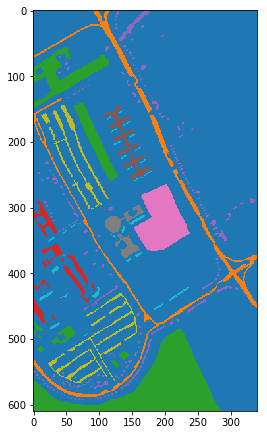

In [2]:
spectrel_data = "E:\\MyPapers\\高光谱数据\\科研实验数据集 - 副本\\Pavia University scene\\PaviaU.mat"
spectrel_label = "E:\\MyPapers\\高光谱数据\\科研实验数据集 - 副本\\Pavia University scene\\PaviaU_gt.mat"

#pavia = sio.loadmat(spectrel_data)
pavia_lab = sio.loadmat(spectrel_label)

#Vega10 detailed color code
cmaps = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
         '#8c564b', '#e377c2','#7f7f7f','#bcbd22','#17becf']

#part34_data = pavia_lab['paviaU_gt'][int(pavia_lab['paviaU_gt'].shape[0]/2):, :int(pavia_lab['paviaU_gt'].shape[1]/2)]
#del(pavia);#del(pavia_lab)
plt.figure(figsize=(4, 8))

#plt.imshow(part34_data, cmap=plt.get_cmap('Vega10'))
plt.imshow(pavia_lab['paviaU_gt'] , cmap=plt.get_cmap('Vega10'))

In [12]:
batch_size = 28
num_classes = 10
epochs = 200

In [13]:
# input image dimensions
img_rows, img_cols = 5, 5
num_predictions = 20
save_dir = os.path.join(os.getcwd(), '34_saved_models')
model_name = 'keras_hyper_34_trained_model.h5'

In [6]:
X_34_train = np.load('./TF_Practice/train_test_data/'+'X_34_train.npy')
X_34_test = np.load('./TF_Practice/train_test_data/'+'X_34_test.npy')

y_34_train = np.load('./TF_Practice/train_test_data/'+'y_34_train.npy')
y_34_test = np.load('./TF_Practice/train_test_data/'+'y_34_test.npy')

In [8]:
X_34_train.shape[1:]

(5, 5, 103)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_34_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
X_34_train /= 255
X_34_test /= 255

In [ ]:
model.fit(X_34_train, y_34_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_34_test, y_34_test),
              shuffle=True)

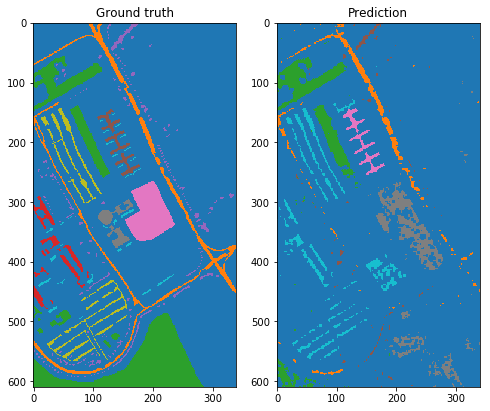

In [3]:
my_model = load_model("../scripts/hyper_34_trained_model_callback.h5")

data_all = np.load("../data/v2.0/five_block_dataset_X.npy")

data_all /= 255

my_pred = my_model.predict_classes(data_all)

my_pred = my_pred.reshape((610, 340))

plt.figure(figsize=(8, 10))
gt_ax = plt.subplot(121)
gt_ax.set_title('Ground truth')
gt_ax.imshow(pavia_lab['paviaU_gt'], cmap=plt.get_cmap('Vega10'))

pre_ax = plt.subplot(122)
pre_ax.set_title('Prediction')
pre_ax.imshow(my_pred, cmap=plt.get_cmap('Vega10'))

del(data_all)

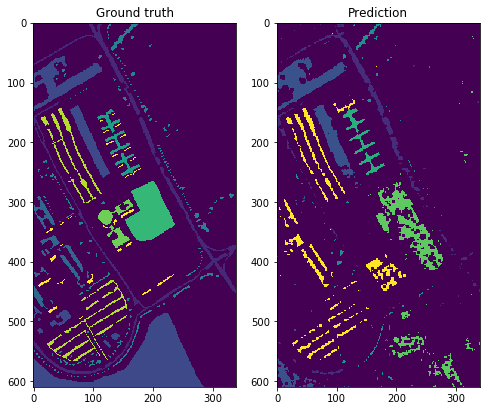

In [7]:
plt.figure(figsize=(8, 10))
gt_ax = plt.subplot(121)
gt_ax.set_title('Ground truth')
gt_ax.imshow(pavia_lab['paviaU_gt'])

pre_ax = plt.subplot(122)
pre_ax.set_title('Prediction')
pre_ax.imshow(my_pred)

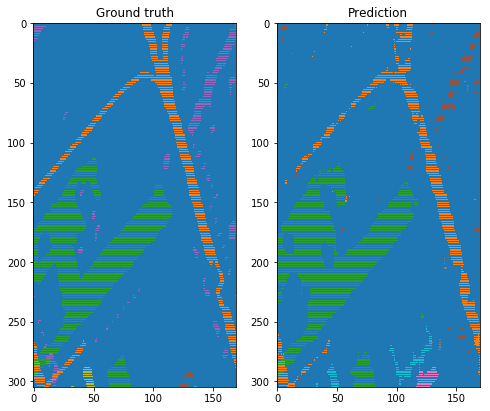

In [47]:
data_Y = np.load("./TF_Practice/split_data/five_block_Y_33.npy")
data_Y = data_Y[:,2,2].reshape((305, 170))

plt.figure(figsize=(8, 10))
gt_ax = plt.subplot(121)
gt_ax.set_title('Ground truth')
gt_ax.imshow(data_Y, cmap=plt.get_cmap('Vega10'))

pre_ax = plt.subplot(122)
pre_ax.set_title('Prediction')
pre_ax.imshow(my_pred, cmap=plt.get_cmap('Vega10'))
